In [1]:
# docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install keras_preprocessing

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import glob as gb

In [4]:
trainpath = "MY_data/train"
testpath = "MY_data/test"
predpath = "MY_data/predict"

print(len(trainpath))
print(len(testpath))
print(len(predpath))

13
12
15


In [5]:
import os

# Assuming 'MY_data' is a subdirectory in the current working directory
trainpath = r'MY_data\train'

for folder in os.listdir(trainpath):
    files = gb.glob(pathname=os.path.join(trainpath, folder, '*.jpeg'))
    print(f"For training data, found {len(files)} in folder {folder}")

For training data, found 230 in folder Apple
For training data, found 230 in folder avocado
For training data, found 230 in folder Banana
For training data, found 230 in folder cherry
For training data, found 230 in folder kiwi
For training data, found 231 in folder mango
For training data, found 230 in folder orange
For training data, found 230 in folder pinenapple
For training data, found 230 in folder strawberries
For training data, found 230 in folder watermelon


In [6]:
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 0 in folder apple
for training data , found 0 in folder avocado
for training data , found 0 in folder banana
for training data , found 0 in folder cherry
for training data , found 0 in folder kiwi
for training data , found 0 in folder mango
for training data , found 0 in folder orange
for training data , found 0 in folder pinenapple
for training data , found 0 in folder stawberries
for training data , found 0 in folder watermelon


In [7]:
files = gb.glob(pathname=str(predpath+"/*.jpeg"))
print(len(files))

48


In [8]:
classes=sorted(os.listdir(trainpath))
",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple,1:Banana,2:avocado,3:cherry,4:kiwi,5:mango,6:orange,7:pinenapple,8:strawberries,9:watermelon'

In [9]:
TRAINING_DIR = trainpath
TESTING_DIR = testpath

train_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )


testing_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)


validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

testing_generator = train_datagen.flow_from_directory(
    TESTING_DIR,
    classes=list(map(lambda x:x.lower().replace("strawberries","stawberries"),classes)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [10]:
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    #A good dose of augmentation so that training data is hard to memorize but not too much to make the learning difficult
    layers.RandomRotation(0.1,input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),
    
    #convolutional portion
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(64, 3,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(128, 4,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Flatten(),
    
    #Dense portion, with high dropout rate for a high regualization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# add callbacks for early stopping and lr reduction during training 
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [11]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=150,
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/150



29/29 [==============================] - 90s 3s/step - loss: 2.2731 - accuracy: 0.1244 - val_loss: 2.1514 - val_accuracy: 0.1870 - lr: 0.0010
Epoch 2/150
29/29 [==============================] - 83s 3s/step - loss: 2.1294 - accuracy: 0.1847 - val_loss: 1.9448 - val_accuracy: 0.2370 - lr: 0.0010
Epoch 3/150
29/29 [==============================] - 84s 3s/step - loss: 1.9887 - accuracy: 0.2189 - val_loss: 1.7677 - val_accuracy: 0.3283 - lr: 0.0010
Epoch 4/150
29/29 [==============================] - 83s 3s/step - loss: 1.8507 - accuracy: 0.2662 - val_loss: 1.6871 - val_accuracy: 0.3326 - lr: 0.0010
Epoch 5/150
29/29 [==============================] - 82s 3s/step - loss: 1.7800 - accuracy: 0.2770 - val_loss: 1.7204 - val_accuracy: 0.3152 - lr: 0.0010
Epoch 6/150
29/29 [==============================] - 83s 3s/step - loss: 1.7480 - accuracy: 0.2966 - val_loss: 1.5776 - val_accuracy: 0.3696 - lr: 0.0010
Epoch 7/150
29/29 [==============================] - 79s 3s/step - loss: 1.7019 - accura

29/29 [==============================] - 79s 3s/step - loss: 1.0118 - accuracy: 0.6323 - val_loss: 0.9362 - val_accuracy: 0.6717 - lr: 3.2768e-04
Epoch 54/150
29/29 [==============================] - 79s 3s/step - loss: 0.9976 - accuracy: 0.6551 - val_loss: 0.9008 - val_accuracy: 0.6609 - lr: 3.2768e-04
Epoch 55/150
29/29 [==============================] - 81s 3s/step - loss: 0.9948 - accuracy: 0.6480 - val_loss: 0.9359 - val_accuracy: 0.6696 - lr: 3.2768e-04
Epoch 56/150
29/29 [==============================] - 79s 3s/step - loss: 1.0166 - accuracy: 0.6382 - val_loss: 0.9723 - val_accuracy: 0.6413 - lr: 3.2768e-04
Epoch 57/150
29/29 [==============================] - 82s 3s/step - loss: 0.9875 - accuracy: 0.6556 - val_loss: 0.9117 - val_accuracy: 0.6630 - lr: 2.6214e-04
Epoch 58/150
29/29 [==============================] - 80s 3s/step - loss: 0.9713 - accuracy: 0.6567 - val_loss: 0.9004 - val_accuracy: 0.6717 - lr: 2.6214e-04
Epoch 59/150
29/29 [==============================] - 80s 3

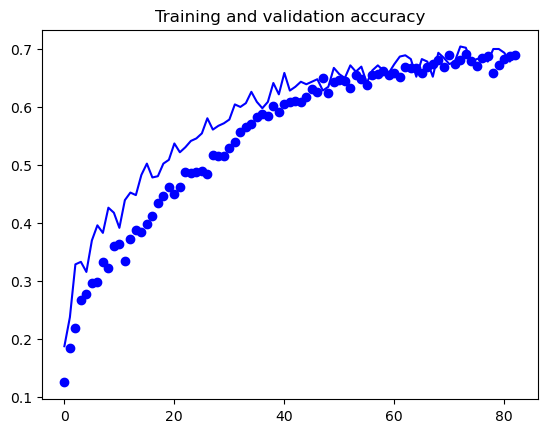

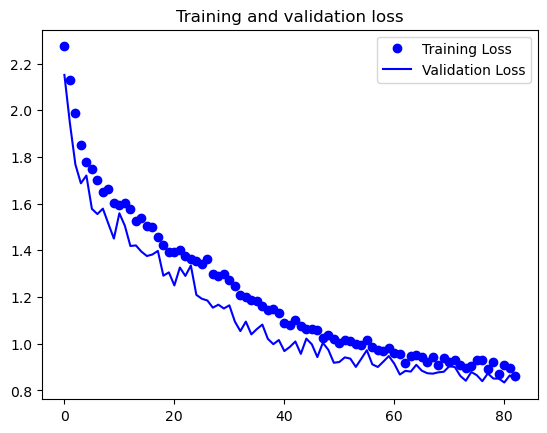

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Desired output. Charts with training and validation metrics. No crash :)


In [13]:
model.evaluate(testing_generator)

17/17 [==============================] - 21s 1s/step - loss: 1.1274 - accuracy: 0.6517


[1.1274381875991821, 0.6517072916030884]

In [14]:
model.evaluate(validation_generator)

8/8 [==============================] - 10s 1s/step - loss: 0.8504 - accuracy: 0.7043


[0.8503910303115845, 0.7043478488922119]